# Documentation pour fiches d'analyse

# 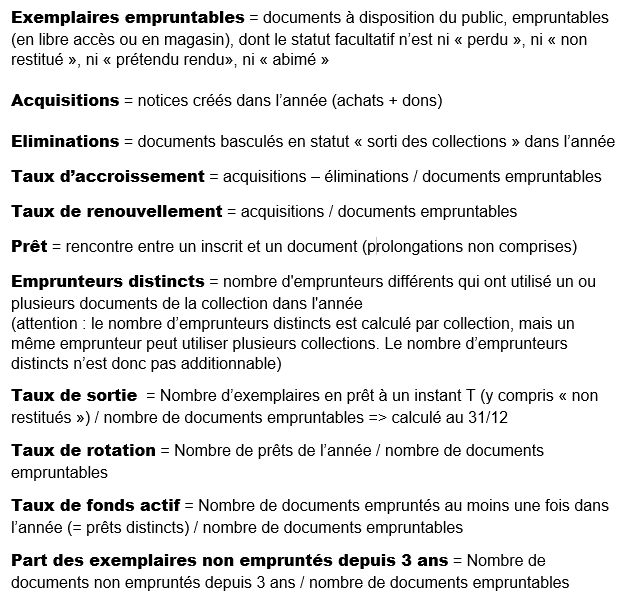

In [1]:
import pandas as pd

In [2]:
# On importe les fichiers générés par script de François et on crée un df par site
# Ces dataframes vont nous resservir
# notamment pour le remplissage des valeurs "TotalSecteur"
# Dans le tableau 3 "Position dans l'ensemble"

df_lgp = pd.read_excel("/home/kibini/kibini_prod/data/collections/2023_synthese.xlsx",sheet_name='grand-plage')
df_med = pd.read_excel("/home/kibini/kibini_prod/data/collections/2023_synthese.xlsx",sheet_name='mediatheque')
df_bus = pd.read_excel("/home/kibini/kibini_prod/data/collections/2023_synthese.xlsx",sheet_name='zebre')
df_coll = pd.read_excel("/home/kibini/kibini_prod/data/collections/2023_synthese.xlsx",sheet_name='collectivites')

In [3]:
# On définit des valeurs "années"

nref = 2024
n1 = nref-1
n2 = nref-2

# On transforme ces valeurs en "strings"

nref = str(nref)
n1 = str(n1)
n2 = str(n2)


In [4]:
# On automatise les noms de variables du tableau
# Pour que celles-ci se mettent à jour en fonction de l'année de référénce
# défini plus haut

nb_prets_nref = f'nb_prets_{nref}'
nb_prets_n1 = f'nb_prets_{n1}'
nb_prets_n2 = f'nb_prets_{n2}'


nb_prets_nref_emprunteurs_distincts = f'nb_prets_{nref}_emprunteurs_distincts'
nb_prets_n1_emprunteurs_distincts = f'nb_prets_{n1}_emprunteurs_distincts'
nb_prets_n2_emprunteurs_distincts = f'nb_prets_{n2}_emprunteurs_distincts'

acquisitions = 'nb_exemplaires_créés_dans_annee'
eliminations = 'nb_exemplaires_empruntables_pas_empruntés_3_ans'


In [5]:
def Add_ColonnesTableau1(df,acquisitions,eliminations,docs_empruntables):
    df['tx_acroissement (En %)'] = round((df[acquisitions]-df[eliminations])/df[docs_empruntables]*100,1)
    df['tx_renouvellement (En %)'] = round((df[acquisitions]/df[docs_empruntables])*100,1)
    return(df.T)

In [6]:
def Add_ColonnesTableau2(df):
    df[f'evolution_prets_{n2}-{nref} (En %)'] = round((df[nb_prets_nref]-df[nb_prets_n2])/df[nb_prets_n2]*100,1)
    df[f'evolution_prets_{n1}-{nref} (En %)'] = round((df[nb_prets_nref]-df[nb_prets_n1])/df[nb_prets_n1]*100,1)
    df[f'evolution_prets_emprunteurs_distincts_{n1}-{nref} (En %)'] = round((df[nb_prets_nref_emprunteurs_distincts]-df[nb_prets_n1_emprunteurs_distincts])/df[nb_prets_n1_emprunteurs_distincts],1)
    df[f'evolution_prets_emprunteurs_distincts_{n2}-{nref} (En %)'] = round((df[nb_prets_nref_emprunteurs_distincts]-df[nb_prets_n2_emprunteurs_distincts])/df[nb_prets_n2_emprunteurs_distincts],1)
    
    df['tx_rotation'] = (df[nb_prets_nref]/df['nb_exemplaires_empruntables']).round(1)
    df['tx_sortie (En %)'] = (df['nb_exemplaires_en_pret']/df['nb_exemplaires_empruntables']*100).round(1)
    df['tx_fonds_actif (En %)'] = (df[f'nb_prets_{nref}_exemplaires_distincts']/df['nb_exemplaires_empruntables']*100).round(1)
    df['Part de docs pas empruntés depuis 3 ans (En %)'] = (df[eliminations]/df['nb_exemplaires_empruntables']*100).round(1)
    
    
    df = df[['nb_prets_2023',
             'evolution_prets_2021-2023 (En %)',
             'evolution_prets_2022-2023 (En %)',
             'nb_prets_2023_emprunteurs_distincts',
             'evolution_prets_emprunteurs_distincts_2021-2023 (En %)',
             'evolution_prets_emprunteurs_distincts_2022-2023 (En %)',
             'tx_rotation',
             'tx_fonds_actif (En %)',
             'Part de docs pas empruntés depuis 3 ans (En %)']]
    
    df=df.T
    
    return(df)
    

In [7]:
def Add_ColonnesTableau3(df,secteur,collection_level,collection_lib):

    df = df[df[collection_level]==(collection_lib)]
    df = df.pivot_table(index=collection_level,
                        values=['nb_exemplaires_empruntables',acquisitions,f'nb_prets_{nref}'],
                        aggfunc=sum)
    df = df.T
    
    # Ajout du total
    df.loc[df.index=='nb_exemplaires_empruntables',[f'Total_{secteur}']] = df_med[df_med['collection_lib1']==secteur]['nb_exemplaires'].sum()
    df.loc[df.index==acquisitions,[f'Total_{secteur}']] = df_med[df_med['collection_lib1']==secteur][acquisitions].sum()
    df.loc[df.index==f'nb_prets_{nref}',[f'Total_{secteur}']] = df_med[df_med['collection_lib1']==secteur][f'nb_prets_{nref}'].sum()
    df.loc[df.index==f'nb_prets_{nref}',[f'Total_{secteur}']] = df_med[df_med['collection_lib1']==secteur][f'nb_prets_{nref}'].sum()
    
    # Ajout de la Part en %
    df[f'Part collection sur Total_{secteur} (En %)'] = round(df[collection_lib] / df[f'Total_{secteur}']*100,1)
    
    return(df)

# SCRIPT

In [8]:
colonnes_vides_a_remplir = ['collection_code',
                            'collection_lib1',
                            'collection_lib2',
                            'collection_lib3',
                            'collection_lib4',
                            'support']

In [9]:
df_med[colonnes_vides_a_remplir] = df_med[colonnes_vides_a_remplir].fillna('aucune donnée')

In [10]:
# Affichage des colonnes
df_med.dtypes

collection_code                                      object
collection_lib1                                      object
collection_lib2                                      object
collection_lib3                                      object
collection_lib4                                      object
support                                              object
nb_exemplaires                                        int64
nb_exemplaires_empruntables                           int64
nb_exemplaires_consultables_sur_place_uniquement      int64
nb_exemplaires_en_acces_libre                         int64
nb_exemplaires_en_acces_indirect                      int64
nb_exemplaires_en_commande                            int64
nb_exemplaires_en_traitement                          int64
nb_exemplaires_en_abîmés                              int64
nb_exemplaires_en_réparation                          int64
nb_exemplaires_en_retrait                             int64
nb_exemplaires_en_reliure               

In [11]:
colonnes_a_agreger = ['collection_code',
                            'collection_lib1',
                            'collection_lib2',
                            'collection_lib3',
                            'collection_lib4',
                            'support']

In [12]:
valeurs_a_agreger_tab1 = ['nb_exemplaires_empruntables',
                          'nb_exemplaires_créés_dans_annee',
                        'nb_exemplaires_éliminés']

In [13]:
valeurs_a_agreger_tab2 = ['nb_prets_2023',
                          'nb_prets_2022',
                          'nb_prets_2021',
                          'nb_prets_2023_emprunteurs_distincts',
                          'nb_prets_2022_emprunteurs_distincts',
                          'nb_prets_2021_emprunteurs_distincts',
                          'nb_exemplaires_empruntables',
                          'nb_exemplaires_en_pret',
                          'nb_prets_2023_exemplaires_distincts',
                          'nb_exemplaires_empruntables_pas_empruntés_3_ans',
                            ]

In [14]:
valeurs_a_agreger_tab3 = ['nb_exemplaires_empruntables',
                          acquisitions,
                          f'nb_prets_{nref}'
                         ]

print('Voici la liste des valeurs à agréger :',valeurs_a_agreger_tab3)

Voici la liste des valeurs à agréger : ['nb_exemplaires_empruntables', 'nb_exemplaires_créés_dans_annee', 'nb_prets_2023']


In [15]:
# Exemple Art, loisiris créatifs
tab1 = df_med[df_med['collection_lib3']=='Arts et loisirs créatifs'].groupby(colonnes_a_agreger)[valeurs_a_agreger_tab1].sum()

In [16]:
tab1 = Add_ColonnesTableau1(df=tab1,
                     acquisitions='nb_exemplaires_créés_dans_annee',
                     eliminations='nb_exemplaires_éliminés',
                     docs_empruntables='nb_exemplaires_empruntables'
                    )

In [17]:
# TABLEAU 2

tab2 = df_med[df_med['collection_lib3']=='Arts et loisirs créatifs'].groupby(colonnes_a_agreger)[valeurs_a_agreger_tab2].sum()

In [18]:
tab2 = Add_ColonnesTableau2(df=tab2)

In [19]:
tab3 = Add_ColonnesTableau3(df=df_med,
                     secteur='Adultes',
                     collection_level='collection_lib3',
                     collection_lib='Arts et loisirs créatifs')

In [20]:
tab1

collection_code                                      AAPATAP          \
collection_lib1                                      Adultes           
collection_lib2                 Arts, création, vie pratique           
collection_lib3                     Arts et loisirs créatifs           
collection_lib4                                         Arts           
support                                                  DVD   Livre   
nb_exemplaires_empruntables                            194.0  2104.0   
nb_exemplaires_créés_dans_annee                          0.0    56.0   
nb_exemplaires_éliminés                                 13.0   396.0   
tx_acroissement (En %)                                  -6.7   -16.2   
tx_renouvellement (En %)                                 0.0     2.7   

collection_code                                           \
collection_lib1                                            
collection_lib2                                            
collection_lib3                                            
collection_lib4                                            
support                         Périodique aucune donnée   
nb_exemplaires_empruntables          144.0          13.0   
nb_exemplaires_créés_dans_annee      108.0          13.0   
nb_exemplaires_éliminés               27.0           0.0   
tx_acroissement (En %)                56.2         100.0   
tx_renouvellement (En %)              75.0         100.0   

collection_code                                      AAPATLC         \
collection_lib1                                      Adultes          
collection_lib2                 Arts, création, vie pratique          
collection_lib3                     Arts et loisirs créatifs          
collection_lib4                             Loisirs créatifs          
support                                                  DVD  Livre   
nb_exemplaires_empruntables                              8.0  554.0   
nb_exemplaires_créés_dans_annee                          0.0   47.0   
nb_exemplaires_éliminés                                  1.0   13.0   
tx_acroissement (En %)                                 -12.5    6.1   
tx_renouvellement (En %)                                 0.0    8.5   

collection_code                                           
collection_lib1                                           
collection_lib2                                           
collection_lib3                                           
collection_lib4                                           
support                         Périodique aucune donnée  
nb_exemplaires_empruntables           68.0           5.0  
nb_exemplaires_créés_dans_annee       36.0           5.0  
nb_exemplaires_éliminés                2.0           0.0  
tx_acroissement (En %)                50.0         100.0  
tx_renouvellement (En %)              52.9         100.0

In [21]:
def Save_DataFrames(df1,df2,df3,secteur,collection):
    with pd.ExcelWriter(f"../data/collections/tableaux_analyse_poldoc_2024_{secteur}_{collection}.xlsx") as writer:
        df1.to_excel(writer,sheet_name="VolumétrieDesCollections")
        df2.to_excel(writer,sheet_name="UsagesDesCollections")
        df3.to_excel(writer,sheet_name="PositionDansEnsemble")

# Ce qu'il reste à faire
* [ ] Ajouter une fonction pour sauvegarder les 3 tableaux dans un même fichier
* [ ] Générer les 3 tableau pour chaque collection définie dans Zebulon
* [ ] Ajouter des conditions si problème d'affichage des variables dans certains tableaux
* [ ] Vérification des valeurs

# TEST

In [22]:
Save_DataFrames(df1=tab1,df2=tab2,df3=tab3,secteur='Adultes',collection="Arts&LoisirsCréatifs")

In [23]:
tab1

collection_code                                      AAPATAP          \
collection_lib1                                      Adultes           
collection_lib2                 Arts, création, vie pratique           
collection_lib3                     Arts et loisirs créatifs           
collection_lib4                                         Arts           
support                                                  DVD   Livre   
nb_exemplaires_empruntables                            194.0  2104.0   
nb_exemplaires_créés_dans_annee                          0.0    56.0   
nb_exemplaires_éliminés                                 13.0   396.0   
tx_acroissement (En %)                                  -6.7   -16.2   
tx_renouvellement (En %)                                 0.0     2.7   

collection_code                                           \
collection_lib1                                            
collection_lib2                                            
collection_lib3                                            
collection_lib4                                            
support                         Périodique aucune donnée   
nb_exemplaires_empruntables          144.0          13.0   
nb_exemplaires_créés_dans_annee      108.0          13.0   
nb_exemplaires_éliminés               27.0           0.0   
tx_acroissement (En %)                56.2         100.0   
tx_renouvellement (En %)              75.0         100.0   

collection_code                                      AAPATLC         \
collection_lib1                                      Adultes          
collection_lib2                 Arts, création, vie pratique          
collection_lib3                     Arts et loisirs créatifs          
collection_lib4                             Loisirs créatifs          
support                                                  DVD  Livre   
nb_exemplaires_empruntables                              8.0  554.0   
nb_exemplaires_créés_dans_annee                          0.0   47.0   
nb_exemplaires_éliminés                                  1.0   13.0   
tx_acroissement (En %)                                 -12.5    6.1   
tx_renouvellement (En %)                                 0.0    8.5   

collection_code                                           
collection_lib1                                           
collection_lib2                                           
collection_lib3                                           
collection_lib4                                           
support                         Périodique aucune donnée  
nb_exemplaires_empruntables           68.0           5.0  
nb_exemplaires_créés_dans_annee       36.0           5.0  
nb_exemplaires_éliminés                2.0           0.0  
tx_acroissement (En %)                50.0         100.0  
tx_renouvellement (En %)              52.9         100.0

In [24]:
tab2

collection_code                                                         AAPATAP  \
collection_lib1                                                         Adultes   
collection_lib2                                    Arts, création, vie pratique   
collection_lib3                                        Arts et loisirs créatifs   
collection_lib4                                                            Arts   
support                                                                     DVD   
nb_prets_2023                                                              98.0   
evolution_prets_2021-2023 (En %)                                          -46.2   
evolution_prets_2022-2023 (En %)                                            3.2   
nb_prets_2023_emprunteurs_distincts                                        45.0   
evolution_prets_emprunteurs_distincts_2021-2023...                         -0.5   
evolution_prets_emprunteurs_distincts_2022-2023...                         -0.2   
tx_rotation                                                                 0.5   
tx_fonds_actif (En %)                                                      32.5   
Part de docs pas empruntés depuis 3 ans (En %)                             27.3   

collection_code                                                        \
collection_lib1                                                         
collection_lib2                                                         
collection_lib3                                                         
collection_lib4                                                         
support                                              Livre Périodique   
nb_prets_2023                                       1607.0      534.0   
evolution_prets_2021-2023 (En %)                      37.2      -23.3   
evolution_prets_2022-2023 (En %)                       5.0       -8.2   
nb_prets_2023_emprunteurs_distincts                  548.0      138.0   
evolution_prets_emprunteurs_distincts_2021-2023...     0.4       -0.0   
evolution_prets_emprunteurs_distincts_2022-2023...    -0.0       -0.0   
tx_rotation                                            0.8        3.7   
tx_fonds_actif (En %)                                 38.6      116.0   
Part de docs pas empruntés depuis 3 ans (En %)        30.5        9.0   

collection_code                                                   \
collection_lib1                                                    
collection_lib2                                                    
collection_lib3                                                    
collection_lib4                                                    
support                                            aucune donnée   
nb_prets_2023                                               45.0   
evolution_prets_2021-2023 (En %)                             2.3   
evolution_prets_2022-2023 (En %)                          4400.0   
nb_prets_2023_emprunteurs_distincts                         29.0   
evolution_prets_emprunteurs_distincts_2021-2023...          -0.2   
evolution_prets_emprunteurs_distincts_2022-2023...          28.0   
tx_rotation                                                  3.5   
tx_fonds_actif (En %)                                      100.0   
Part de docs pas empruntés depuis 3 ans (En %)               0.0   

collection_code                                                         AAPATLC  \
collection_lib1                                                         Adultes   
collection_lib2                                    Arts, création, vie pratique   
collection_lib3                                        Arts et loisirs créatifs   
collection_lib4                                                Loisirs créatifs   
support                                                                     DVD   
nb_prets_2023                                                              16.0   
evolution_prets_2021-2023 (En %)                        

In [25]:
tab3

collection_lib3,Arts et loisirs créatifs,Total_Adultes,Part collection sur Total_Adultes (En %)
nb_exemplaires_créés_dans_annee,265.0,7961.0,3.3
nb_exemplaires_empruntables,3090.0,140940.0,2.2
nb_prets_2023,3899.0,153150.0,2.5
